# Scatter and Quiver with GAIA DR2

In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Angle

In [2]:
Gaia.ROW_LIMIT = -1
center = [Angle('09h32m10.111s'), Angle('+21d30m02.99s')]
coord = SkyCoord(center[0].to(u.deg), center[1], frame='icrs', unit='deg')
r = Gaia.query_object_async(coordinate=coord, radius=u.Quantity(0.5, u.deg))

INFO: Query finished. [astroquery.utils.tap.core]


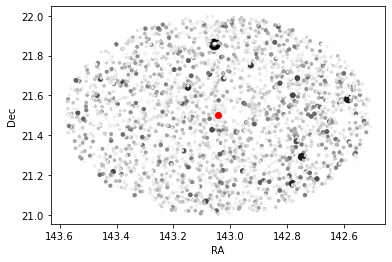

In [3]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x=r['ra'], y=r['dec'], s=5**(np.max(r['phot_g_mean_mag'])/r['phot_g_mean_mag']), c=(np.max(r['phot_g_mean_mag'])-r['phot_g_mean_mag'])/(np.max(r['phot_g_mean_mag'])-np.min(r['phot_g_mean_mag'])), cmap='binary')
ax.scatter(center[0].to(u.deg), center[1], c='red')
ax.invert_xaxis()
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

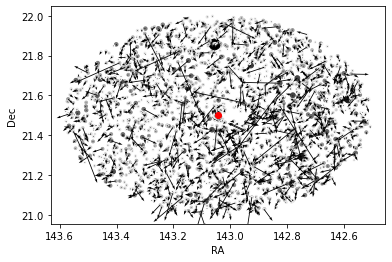

In [4]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x=r['ra'], y=r['dec'], s=5**(np.max(r['phot_g_mean_mag'])/r['phot_g_mean_mag']), c=(np.max(r['phot_g_mean_mag'])-r['phot_g_mean_mag'])/(np.max(r['phot_g_mean_mag'])-np.min(r['phot_g_mean_mag'])), cmap='binary')
ax.quiver(r['ra'].filled(0), r['dec'].filled(0), r['pmra'].filled(0), r['pmdec'].filled(0))
ax.scatter(center[0].to(u.deg), center[1], c='red')
ax.invert_xaxis()
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

# XMatch with VizieR 

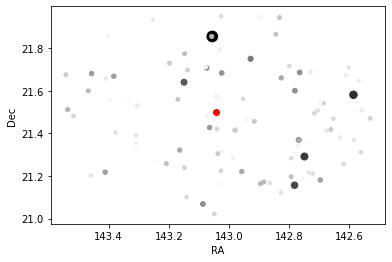

In [5]:
r.sort('phot_g_mean_mag')
_100stars = r[:100]
fig, ax = plt.subplots(1, 1)
ax.scatter(x=_100stars['ra'], y=_100stars['dec'], s=5**(np.max(r['phot_g_mean_mag'])/_100stars['phot_g_mean_mag']), c=(np.max(r['phot_g_mean_mag'])-_100stars['phot_g_mean_mag'])/(np.max(r['phot_g_mean_mag'])-np.min(r['phot_g_mean_mag'])), cmap='binary')
ax.scatter(center[0].to(u.deg), center[1], c='red')
ax.invert_xaxis()
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [6]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1
cat_names = ['WISE', 'PanStarrs']
cats = []
for i in range(len(cat_names)):
    cats.append(Vizier.query_region(coord, radius=1*u.arcmin, catalog=cat_names[i])[0].meta['name'])

In [7]:
from astroquery.xmatch import XMatch
match1 = XMatch.query(cat1=_100stars, cat2=f'vizier:{cats[1]}', max_distance=0.2 * u.arcsec, colRA1='ra', colDec1='dec')
print(match1.columns)
len(match1)

Could not import regions, which is required for some of the functionalities of this module.
<TableColumns names=('angDist','solution_id','DESIGNATION','source_id','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','astrometric_weight_al','astrometric_pseudo_colour','astrometric_pseudo_colour_error','mean_varpi_factor_al','astrometric_matched_observations','visibility_periods_used','astrometric_sigma5d_max','frame_rotator_object_type','matched_observations','d

96

In [8]:
match2 = XMatch.query(cat1=match1, cat2=f'vizier:{cats[0]}', max_distance=0.2 * u.arcsec, colRA1='ra', colDec1='dec')
print(match2.columns)
len(match2)

<TableColumns names=('angDist_1','angDist_2','solution_id','DESIGNATION','source_id','random_index','ref_epoch','ra_1','ra_error','dec_1','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','astrometric_weight_al','astrometric_pseudo_colour','astrometric_pseudo_colour_error','mean_varpi_factor_al','astrometric_matched_observations','visibility_periods_used','astrometric_sigma5d_max','frame_rotator_object_type','matched_observations','duplicated_source','phot_g_n_obs','phot_g_mean_flux','phot_g_mean_flux_erro

29

In [9]:
from astropy.table import QTable
fin_tab = QTable([match2['DESIGNATION'], match2['ra_1'], match2['dec_1']], names=('name', 'ra', 'dec'))

In [10]:
#https://coolwiki.ipac.caltech.edu/index.php/Central_wavelengths_and_zero_points
#http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?mode=browse&gname=PAN-STARRS&asttype=
wav = [0.673, 0.532, 0.797, 1.235, 1.662, 2.159, 3.4, 4.6, 12, 22, 0.4866, 0.6215, 0.7545, 0.8679, 0.9633]*u.um 
wav_nam = ['G', 'BP', 'RP', 'J', 'H', 'K', 'W1', 'W2', 'W3', 'W4', 'g', 'r', 'i', 'z', 'y']
wav_nam_match2 = [['phot_g_mean_mag'], ['phot_bp_mean_mag'], ['phot_rp_mean_mag'],
                  ['Jmag','e_Jmag'],['Hmag','e_Hmag'],['Kmag','e_Kmag'],['W1mag','e_W1mag'],['W2mag','e_W2mag'],['W3mag','e_W3mag'],['W4mag','e_W4mag'],['gmag','e_gmag'],['rmag','e_rmag'],['imag','e_imag'],['zmag','e_zmag'],['ymag','e_ymag']]
zp = [3296, 3534, 2620, 1594, 1024, 666.7, 309.54, 171.79, 31.676, 8.3635, 3964.03, 3173.02, 2575.36, 2261.81, 2180.40]

for i, nam in enumerate(wav_nam_match2[0:3]):
    fin_tab[f'F_{wav_nam[i]}'] = zp[i]*10**(-0.4*np.ma.filled(match2[f'{nam[0]}'],np.nan))*u.Jy
    fin_tab[f'eF_{wav_nam[i]}'] = np.nan*u.Jy

for i, nam in enumerate(wav_nam_match2[3:]):
    j=i+3
    fin_tab[f'F_{wav_nam[j]}'] = zp[j]*10**(-0.4*np.ma.filled(match2[f'{nam[0]}'],np.nan))*u.Jy
    fin_tab[f'eF_{wav_nam[j]}'] = 0.4*np.log(10)*fin_tab[f'F_{wav_nam[j]}']*np.ma.filled(match2[nam[1]],np.nan)*u.Jy

fin_tab

name,ra,dec,F_G,eF_G,F_BP,eF_BP,F_RP,eF_RP,F_J,eF_J,F_H,eF_H,F_K,eF_K,F_W1,eF_W1,F_W2,eF_W2,F_W3,eF_W3,F_W4,eF_W4,F_g,eF_g,F_r,eF_r,F_i,eF_i,F_z,eF_z,F_y,eF_y
,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2,Jy,Jy2
str27,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Gaia DR2 634960341474302080,142.7674423750671,21.37010812766655,0.16293505498830463,nan,0.14505137674345883,nan,0.17367084604739072,nan,0.1465845901473838,0.004860338286758512,0.10722596332041212,0.004246626761244325,0.07549713221691456,0.002781417139303488,0.03783700725497385,0.0011151734895207728,0.02046434645590225,0.0005654507890467127,0.0035182794714485968,0.00020738912931697948,0.0030143110197071088,nan,0.16089291961056856,nan,0.14134251330622238,nan,0.11642277481635643,nan,0.10618327591547377,nan,0.10058568395714507,nan
Gaia DR2 634937183010638080,143.08630809876507,21.068538508795207,0.13266161344292185,nan,0.08913964434487838,nan,0.18849214209057435,nan,0.23707639628541677,0.005022174899085457,0.2422701770225417,0.005578476980891332,0.174233016294522,0.003851388921860689,0.08740107579144021,0.0019319847765985254,0.04456540726183908,0.000861971396364282,0.00892750977307328,0.00023023113031561657,0.0030675246494823744,0.0009888531142405862,0.09047673762755143,nan,0.1309401425927602,nan,0.130388096741401,nan,0.12521493138391127,nan,0.1293409877845507,nan
Gaia DR2 634960337181385344,142.76621576606166,21.369500241635517,0.06694951599542956,nan,0.057583809048663524,nan,0.076674455815428,nan,0.07146416390697753,0.0015797022575567005,0.056066049567105765,0.0015491621994753962,0.03762967393463673,0.000831797052058763,0.01670001180933327,0.0008305890820918989,0.00914951091733203,0.0004634856038215703,0.0014227557002995496,0.00019262974470914438,0.003314271339495364,0.001507963015818784,0.06446692162222784,nan,0.06354374540985486,nan,0.0543548055004583,nan,0.04773710961923443,nan,0.04559698988270592,nan
Gaia DR2 634941198804515456,143.20806580363896,21.25850332904488,0.03915277218072585,nan,0.02655121602761228,nan,0.05584393194933571,nan,0.06906981886276702,0.0013359287364293332,0.07222706322002909,0.001596566007179304,0.05006456593341242,0.0010144457242083384,0.026152714829223867,0.0005299258915024378,0.013545588549947833,0.000261994910275902,0.0026590734532988456,0.00015919131526329517,0.0033265040860599037,nan,0.026286752287070603,nan,0.03814809096329736,nan,0.037952286517732005,nan,0.036446524421668625,nan,0.03768219332579667,nan
Gaia DR2 634861351068151040,142.79265867804597,21.19688129625542,0.03838253654904415,nan,0.02516077262868141,nan,0.05616851298642726,nan,0.07435125731748249,0.0015750408900503169,0.07732144411294045,0.0017803920458322896,0.05576098734890697,0.001283944182402228,0.02761320252980193,0.0006103847857434952,0.014183972470801748,0.0002743423499939307,0.0026836775570317525,0.00015572077761804462,0.0021379033177155774,nan,0.017886976342603497,nan,0.02944915307870415,nan,0.03311600549862923,nan,0.03522541512216963,nan,0.03744002873250205,nan
Gaia DR2 634942440050606976,143.02621651917667,21.224284147365736,0.024465825022872593,nan,0.018823455231703038,nan,0.031135695170380038,nan,0.03165835298267644,0.0006998020958078819,0.02910046687297115,0.0005896554507436598,0.01953126871307281,0.0003417903022134667,0.009565700481802554,0.00021144805760106746,0.005093283844063863,0.00010789501897430553,0.0008455325563136301,0.00013394745339485325,0.0026520887985640694,nan,0.018253112587500182,nan,0.02207358176240529,nan,0.020494529193893767,nan,0.018830251469275035,nan,0.019719512459973162,2.542727904160895e-05
Gaia DR2 637968296050171520,142.6850032664427,21.54268520594592,0.023626484956595122,nan,0.01913791526840651,nan,0.02866943303371242,nan,0.02767504381090862,0.0006117517759387711,0.023653747508973

# Fit Plank function

In [11]:
from astropy.modeling import models
def planck(lam, T, omega):
    b = models.BlackBody(temperature=T*u.K)
    res = (b(lam * u.um)).to(u.Jy/u.sr) * np.pi * omega
    return res.value

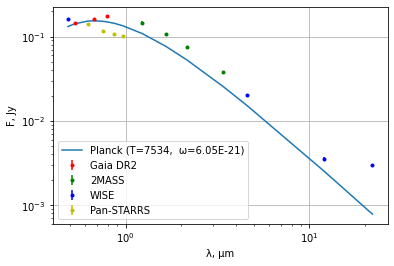

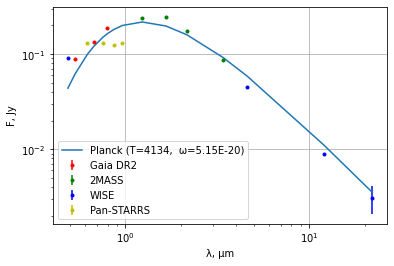

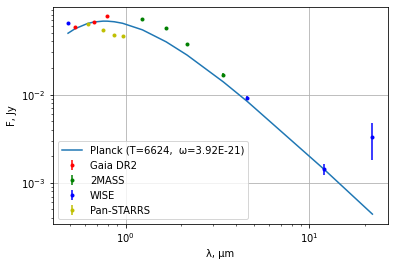

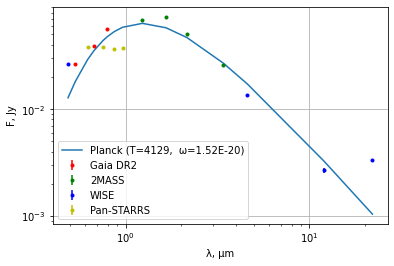

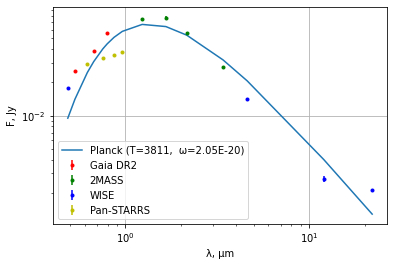

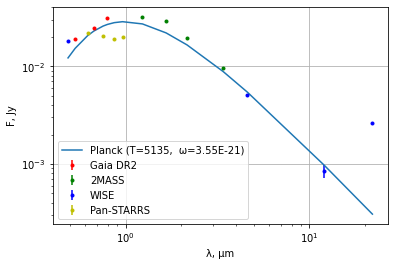

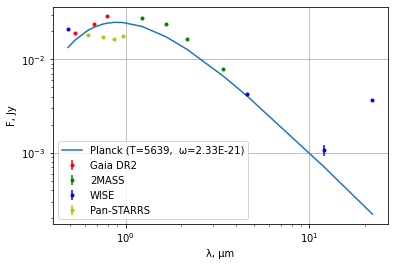

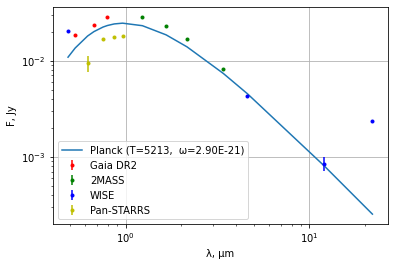

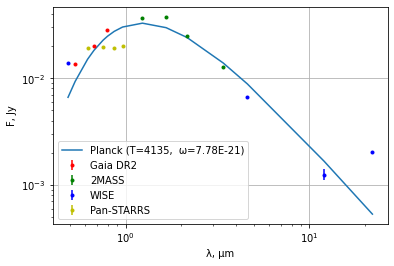

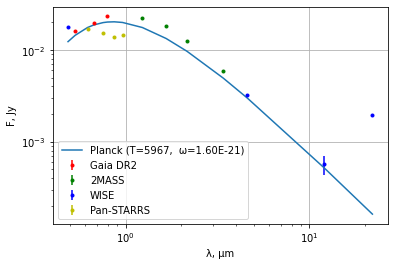

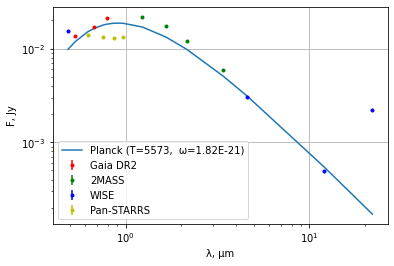

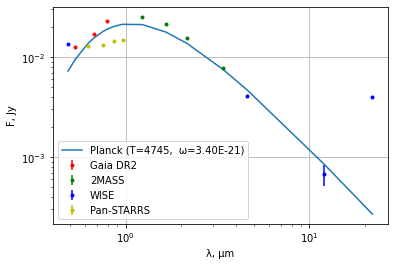

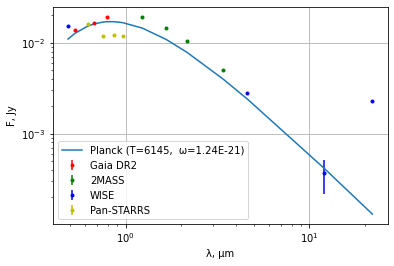

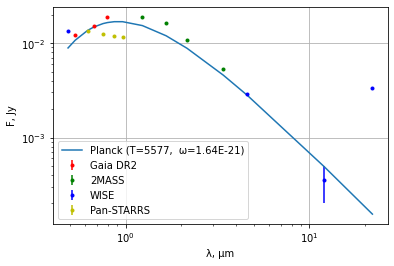

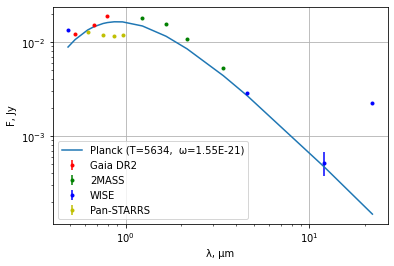

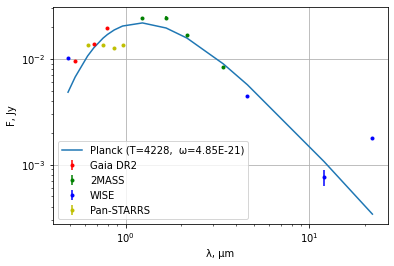

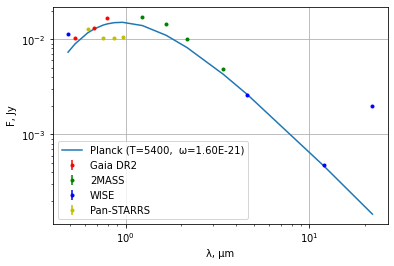

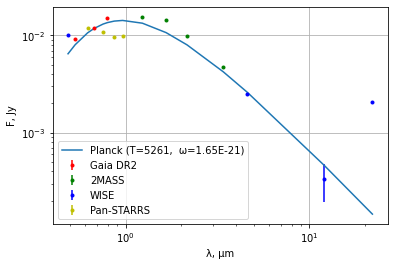

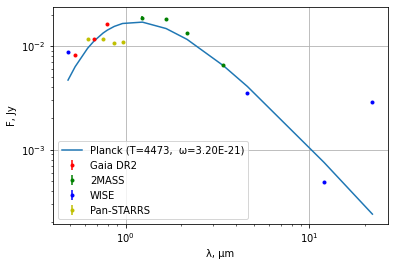

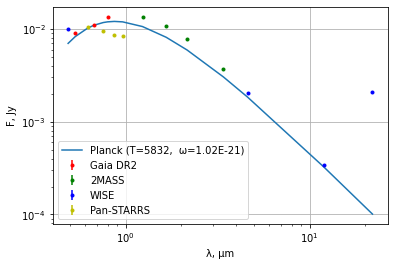

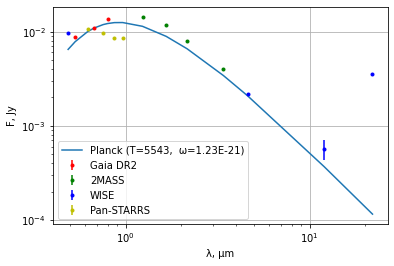

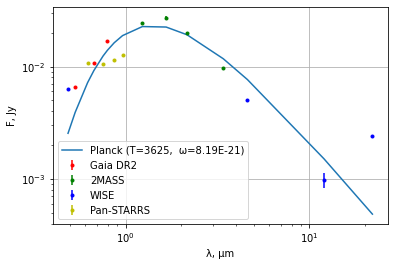

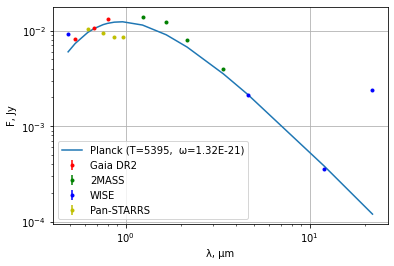

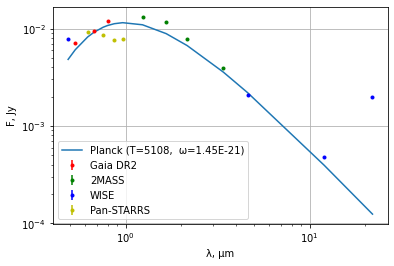

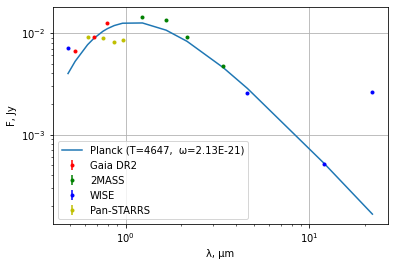

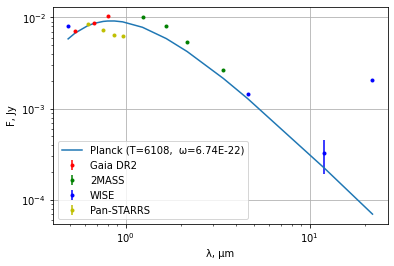

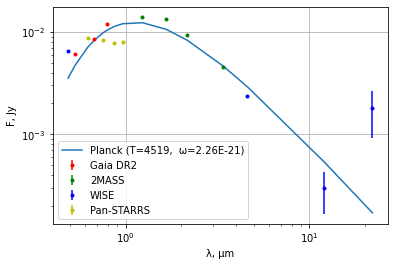

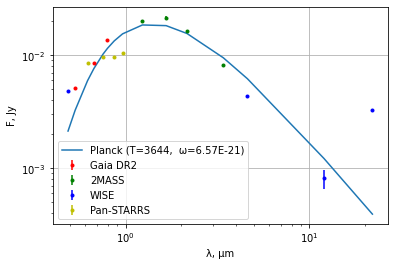

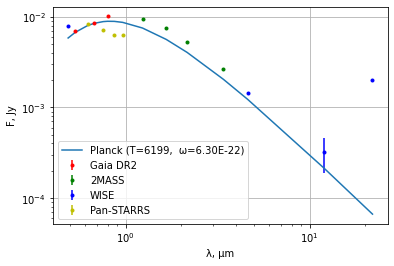

In [12]:
from scipy.optimize import curve_fit
from scipy.optimize import Bounds
for i in range(len(fin_tab)):
    fig1, ax1 = plt.subplots(1, 1)
    sed = np.array([fin_tab[f'F_{nam}'][i].value for nam in wav_nam])
    e_sed=np.array([fin_tab[f'eF_{nam}'][i].value for nam in wav_nam])
    ax1.errorbar(wav[0:3].value, sed[0:3], yerr=e_sed[0:3], fmt='.', c='r', label='Gaia DR2')
    ax1.errorbar(wav[3:7].value, sed[3:7], yerr=e_sed[3:7], fmt='.', c='g', label='2MASS')
    ax1.errorbar(wav[7:11].value, sed[7:11], yerr=e_sed[7:11], fmt='.', c='b', label='WISE')
    ax1.errorbar(wav[11:16].value, sed[11:16], yerr=e_sed[11:16], fmt='.', c='y', label='Pan-STARRS')
    popt, pcov = curve_fit(planck, wav.value, sed, p0=(5000, 1e-20), bounds=([2000, 1e-23], [8000, 1e-18]))
    wav_s = np.sort(wav)
    synth_sed = planck(wav_s.value, *popt)
    ax1.plot(wav_s, synth_sed, label=f'Planck (T={popt[0]:.0f},  \u03C9={popt[1]:.2E})')
    ax1.set_xlabel('\u03BB, \u03BCm')
    ax1.set_ylabel('F, Jy')
    ax1.legend()
    ax1.grid()
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    plt.show()
    plt.close(fig=fig1)
